<a href="https://colab.research.google.com/github/MahmoudFarouq/faceVerification/blob/master/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import pickle

import numpy as np
import matplotlib.pyplot as plt
from skimage import color


from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import regularizers
from keras.optimizers import Adam
from keras.initializers import glorot_uniform

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [3]:
!wget https://github.com/MahmoudFarouq/faceVerification/raw/master/dataSet/dataObject.pkl

--2019-01-05 12:05:21--  https://github.com/MahmoudFarouq/faceVerification/raw/master/dataSet/dataObject.pkl
Resolving github.com (github.com)... 192.30.255.112, 192.30.255.113
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MahmoudFarouq/faceVerification/master/dataSet/dataObject.pkl [following]
--2019-01-05 12:05:21--  https://raw.githubusercontent.com/MahmoudFarouq/faceVerification/master/dataSet/dataObject.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27648166 (26M) [application/octet-stream]
Saving to: ‘dataObject.pkl’

dataObject.pkl      100%[===================>]  26.37M   170MB/s    in 0.2s    

2019-01-05 12:05:22 (170 MB/s) - ‘dat

In [0]:
with open("dataObject.pkl", 'rb') as dataFile:
  X = pickle.load(dataFile)

In [5]:
X.shape

(1000, 48, 48, 3)

In [0]:
y = [
    np.full((250, 1), 0), 
    np.full((250, 1), 1), 
    np.full((250, 1), 2), 
    np.full((250, 1), 3)
]
y = np.vstack(y)

# onehot encoding
y_encoder = OneHotEncoder(sparse=False, categories='auto')
y = y_encoder.fit_transform(y)

In [7]:
y.shape

(1000, 4)

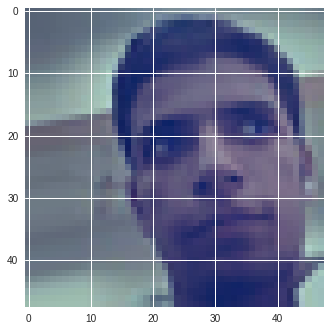

In [8]:
plt.imshow( X[750].reshape(48, 48, 3) )

In [0]:
X = color.rgb2gray( X )
X = X.reshape(1000, -1)

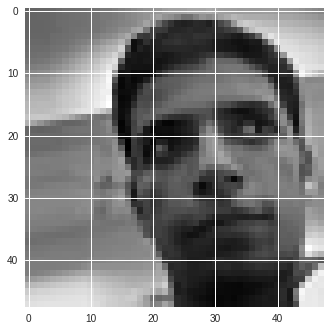

In [11]:
plt.imshow( X[750].reshape(48, 48), cmap='gray' )

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2304), (200, 2304), (800, 4), (200, 4))

In [0]:
n = X_train.shape[1] # num of features -> 48 * 48 in this case
drop = 0.3

model = Sequential()

model.add(Dense(2000, activation="relu", kernel_initializer=glorot_uniform(seed=0), input_shape=(n,)))
model.add(Dropout(drop))
model.add(Dense(2000, activation="relu", kernel_initializer=glorot_uniform(seed=0)))
model.add(Dropout(drop))
model.add(Dense(2000, activation="relu", kernel_initializer=glorot_uniform(seed=0)))
model.add(Dropout(drop))
model.add(Dense(2000, activation="relu", kernel_initializer=glorot_uniform(seed=0)))
model.add(Dropout(drop))
model.add(Dense(1500, activation="relu", kernel_initializer=glorot_uniform(seed=0)))
model.add(Dropout(drop))
model.add(Dense(1500, activation="relu", kernel_initializer=glorot_uniform(seed=0)))
model.add(Dropout(drop))
model.add(Dense(1000, activation="relu", kernel_initializer=glorot_uniform(seed=0)))
model.add(Dropout(drop))
model.add(Dense(1000, activation="relu", kernel_initializer=glorot_uniform(seed=0)))
model.add(Dropout(drop))
model.add(Dense(1000, activation="relu", kernel_initializer=glorot_uniform(seed=0)))
model.add(Dropout(drop))
model.add(Dense(1000, activation="relu", kernel_initializer=glorot_uniform(seed=0)))
model.add(Dropout(drop))
model.add(Dense(800 , activation="relu", kernel_initializer=glorot_uniform(seed=0)))
model.add(Dense(400 , activation="relu", kernel_initializer=glorot_uniform(seed=0)))
model.add(Dense(200 , activation="relu", kernel_initializer=glorot_uniform(seed=0)))
model.add(Dense(100 , activation="relu", kernel_initializer=glorot_uniform(seed=0)))
model.add(Dense(50  , activation="relu", kernel_initializer=glorot_uniform(seed=0)))
model.add(Dense(4   , activation="softmax"))

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 2000)              4610000   
_________________________________________________________________
dropout_16 (Dropout)         (None, 2000)              0         
_________________________________________________________________
dense_82 (Dense)             (None, 2000)              4002000   
_________________________________________________________________
dropout_17 (Dropout)         (None, 2000)              0         
_________________________________________________________________
dense_83 (Dense)             (None, 2000)              4002000   
_________________________________________________________________
dropout_18 (Dropout)         (None, 2000)              0         
_________________________________________________________________
dense_84 (Dense)             (None, 2000)              4002000   
__________

In [0]:
opt = Adam(lr=0.0001)
model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

In [45]:
model.fit(
    X_train, 
    y_train,
    validation_data=(X_test,y_test),
    epochs=1000,
    shuffle=True,
    batch_size=64,
    verbose=1
)

Train on 800 samples, validate on 200 samples
Epoch 1/1000
800/800 [==============================] - 4s 5ms/step - loss: 1.3881 - acc: 0.2450 - val_loss: 1.3871 - val_acc: 0.2200
Epoch 2/1000
800/800 [==============================] - 1s 815us/step - loss: 1.3850 - acc: 0.2525 - val_loss: 1.3898 - val_acc: 0.2200
Epoch 3/1000
800/800 [==============================] - 1s 831us/step - loss: 1.3844 - acc: 0.2625 - val_loss: 1.3874 - val_acc: 0.2300
Epoch 4/1000
800/800 [==============================] - 1s 815us/step - loss: 1.3851 - acc: 0.2613 - val_loss: 1.3855 - val_acc: 0.2300
Epoch 5/1000
800/800 [==============================] - 1s 821us/step - loss: 1.3936 - acc: 0.2250 - val_loss: 1.3880 - val_acc: 0.2200
Epoch 6/1000
800/800 [==============================] - 1s 814us/step - loss: 1.3884 - acc: 0.2462 - val_loss: 1.3860 - val_acc: 0.2400
Epoch 7/1000
800/800 [==============================] - 1s 817us/step - loss: 1.3867 - acc: 0.2438 - val_loss: 1.3876 - val_acc: 0.2550
Epoc

In [0]:
names = ['karim', 'omar', 'amr', 'farouq']

In [47]:
model.evaluate(X_test, y_test)

200/200 [==============================] - 0s 251us/step


[2.646080551147461, 0.52]

'omar'

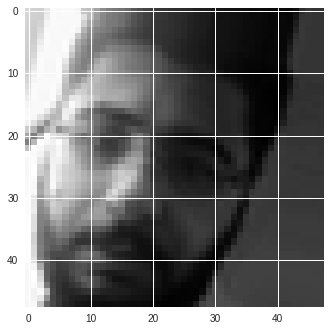

In [48]:
index = np.random.randint(0, 800)
plt.imshow(X_train[index].reshape(48, 48), cmap='gray')
names[np.argmax(model.predict(X_train[index].reshape(1, -1)))]

'farouq'

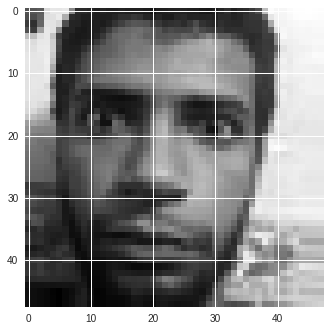

In [49]:
index = np.random.randint(0, 200)
plt.imshow(X_test[index].reshape(48, 48), cmap='gray')
names[np.argmax(model.predict(X_train[index].reshape(1, -1)))]

In [50]:
print("train acc: ", np.sum(np.argmax(model.predict(X_train), axis=1) == np.argmax(y_train, axis=1)) / 800)
print("test acc: ", np.sum(np.argmax(model.predict(X_test), axis=1) == np.argmax(y_test, axis=1)) / 200)

train acc:  0.99875
test acc:  0.52


In [0]:
model.save("model_ann.mdl")

In [52]:
# to upload trained model to drive

!pip3 install pydrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os

def upload(path, folder_id):
	# Authenticate and create the PyDrive client.
	auth.authenticate_user()
	gauth = GoogleAuth()
	gauth.credentials = GoogleCredentials.get_application_default()
	drive = GoogleDrive(gauth)
	if not os.path.exists(path):
		print("wrong path")
		return
	if os.path.isfile(path):
		uploadFile(drive, path, folder_id)
	else:
		uploadDirectory(drive, path, folder_id)


def uploadDirectory(drive, directoryPath, folder_id):
	# create foder in drive under folder with folder id = folder_id

	dirName = getName(directoryPath)
	print("uploading directory : {name}".format(name=element))
	metadata = {'parents':[{u'id': folder_id}], 'title' : dirName, 'mimeType' : 'application/vnd.google-apps.folder'}
	folder = drive.CreateFile(metadata)
	folder.Upload()
	new_folder_id = folder.attr['metadata']['id']

	for element in os.listdir(directoryPath):
		elementPath = os.path.join(directoryPath, element)
		if os.path.isfile(elementPath):
			uploadFile(drive, elementPath, new_folder_id)
		elif os.path.isdir(elementPath):
			uploadDirectory(drive, elementPath, new_folder_id)
	
	print("uploaded directory  : {name}".format(name=element))

def uploadFile(drive, filePath, folder_id):
	if os.stat(filePath).st_size == 0:
		return
	print("uploading file : {name}".format(name=getName(filePath)))
	file = drive.CreateFile({'parents':[{u'id': folder_id}], 'title':getName(filePath)})
	file.SetContentFile(filePath)
	file.Upload()
	print("uploaded file  : {name}".format(name=getName(filePath)))


def getName(path):
	return path.split('/')[-1] if path.split('/')[-1] != '' else path.split('/')[-2]

    100% |████████████████████████████████| 993kB 19.4MB/s 
  Running setup.py bdist_wheel for pydrive ... - \ done
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built pydrive


In [54]:
# upload from colab to drive

folder_id = '1AHB09g_MMM73vmCGEgrg0MVzzKih0Uh_'
upload("model_ann.mdl", folder_id)

uploading file : model_ann.mdl
uploaded file  : model_ann.mdl


In [0]:
from keras.models import load_model
model = load_model("model_ann.mdl")

In [0]:
def testAndPlot(data, labels):
    start = np.random.randint(0, data.shape[0]-21)
    end = start + 20
    images = data[start:end,:,:]
    preds = [ names[prediction] for prediction in np.argmax(model.predict(images.reshape(-1, 48*48)), axis=1) ]
    plt.figure(figsize=(4, 5))
    correctPredections = 0
    wrongPredictions = 0
    images = zip(images, preds)
    for i, (img, pred) in enumerate(images):
        plt.subplot(4, 5, i + 1)
        plt.imshow(img, cmap='gray')

        if names[np.argmax(labels[start+i])] == pred:
            correctPredections += 1
            color = 'g'
        else:
            wrongPredictions += 1
            color = 'r'
        plt.title(pred, color=color)
    plt.show()
    print(f"Correctly Classified: {correctPredections}")
    print(f"MisClassified: {wrongPredictions}")

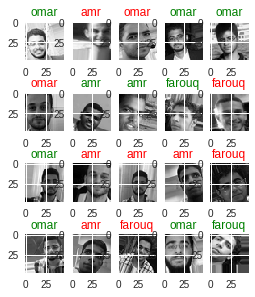

Correctly Classified: 10
MisClassified: 10


In [66]:
testAndPlot(X_test.reshape(-1, 48, 48), y_test)

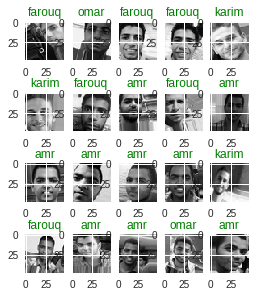

Correctly Classified: 20
MisClassified: 0


In [67]:
testAndPlot(X_train.reshape(-1, 48, 48), y_train)